<a href="https://colab.research.google.com/github/bda-lab/KGembedding/blob/main/Rank_Distribution_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Input and output files

test_data='df_test14.csv'
all_pairs='Dataset_Pairs_Label.csv'
!unzip all_embeds.zip

lists=[(r'all_embeds/HPO17zt4f_100_-0.1_1000_cls.pkl','ElEm'),(r'all_embeds/Run_HPOfull_Embeddings_TransE1','TransE1'),\
      (r'all_embeds/Owl2Vec_Output_Embeddings2.txt','owl2vec'),\
       (r'all_embeds/Opa2vec_embeddings2.txt','opa2vec'),(r'all_embeds/Run_HPOfull_Embeddings_DistMult1','DistMult1'),\
       (r'all_embeds/Run_Embeddings__rdf2vec_skip-gram.txt','rdf2vec')]


rel_file=r'all_embeds2/HPO17zt4f_100_-0.1_1000_rel.pkl'


output_rank_distribution='mer_all_ranks4_new3.csv'




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
import seaborn as sns
import re
df_pairs=pd.read_csv(test_data,sep=',')
df_pairs_all=pd.read_csv(all_pairs,sep=';')
df_pairs.head()
df_pairs['Entity A']=df_pairs['Entity A'].astype(str)

list_actual=list(set(df_pairs['Entity A'].values.tolist()+df_pairs_all['Entity B'].values.tolist()))

<Figure size 1800x600 with 0 Axes>

In [ ]:
#dfr=pd.read_pickle("HPO17zt52_100_-0.1_1000_rel.pkl")

In [ ]:
def calc_rank(k,vals_gen,vals_dis,keys_dis,keys_gen,iselem):
   cals_dist={}
   for i in range(len(vals_gen)):
       dists={}
       if iselem==False:
         for j in range(len(vals_dis)):
            dists[keys_dis[j]]=np.linalg.norm(vals_gen[i]-vals_dis[j])
       else:
         for j in range(len(vals_dis)):
            dists[keys_dis[j]]=np.linalg.norm(vals_gen[i][:-1]-vals_dis[j][:-1])
       cals_dist[keys_gen[i]]=dists

   for i in cals_dist:
      lista=[]
      lista.append(sorted(cals_dist[i].items(), key=lambda x:x[1]))
      cals_dist[i]=lista[0]

   df_pairs2=df_pairs[df_pairs['Label']==k]
   df_pairs2=df_pairs2.astype('str')

   dist_1=[]
   rank_info=[]
   for i in range(len(df_pairs2)):
      c=0
    #rank_info=[]
  #if df_pairs2.iloc[i,1] in keys_gen:
      for j in cals_dist[df_pairs2.iloc[i,1]]:
         #c+=1
         if j[0]==df_pairs2.iloc[i,2]:
          c+=1
          rank_info.append(c)
          #print(c)
          dist_1.append(j[1])
         c+=1
   return rank_info

In [ ]:
def collect_rank_distribution_all(a,type1,k,rel_file_name_elem):
   if type1!='opa2vec' and type1!='ElEm':
     gene_list=list(set(df_pairs['Entity A'].values.tolist()))
     mod1=[]
     with open(a, 'r') as fp:
       for line in fp:
           x = line[:-1]
           mod1.append(x)


     mod_brk=mod1[0].replace(']','[').split('[')
     keys=[mod_brk[i] for i in range(len(mod_brk)) if i%2==0 and len(mod_brk[i])>0]
     vals=[mod_brk[i] for i in range(len(mod_brk)) if i%2!=0 and len(mod_brk[i])>0]



     keys2=[re.search(r'http:[A-Za-z:/0-9].+\d{1}',i).group() for i in keys]
     vals2=[np.fromstring(i, dtype=float, sep=',') for i in vals]
     keys_dis=[i.split('/')[-1] for i in keys2 if 'C' in i]
     keys_dis_i=[keys2.index(i) for i in keys2 if 'C' in i ]
     keys_gen=[i.split('/')[-1] for i in keys2 if 'C' not in i]
     keys_gen=[i for i in keys_gen if i in gene_list]
     keys3=[i.split('/')[-1] for i in keys2]
     keys_gen_i=[keys3.index(i) for i in keys_gen]
     #keys_gen_i=[keys2.index(i) for i in keys2 if 'C' not in i and i in gene_list]
     #print(keys_gen[:5])


     vals_dis=[vals2[i] for i in keys_dis_i]
     vals_gen=[vals2[i] for i in keys_gen_i]
     iselem=False

   elif type1=='opa2vec':
      gene_list=list(set(df_pairs['Entity A'].values.tolist()))
      dataset = open(a, 'r')
      data = dataset.readlines()
      entities = []
      vectors = []
      k2=[]
      for line in data:
        k2.append(line.strip('\n'))

      for i in range(len(k2)):
               if len(k2[i])==0:
                   k2[i]='ooo'

      k3=' '.join(k2).split('ooo')
      for i in range(len(k3)):
            k3[i]=k3[i].lstrip().rstrip()

      k3=k3[:-1]

      keys2=[k3i.split()[0] for k3i in k3]
      vals2=[k3i.split()[1:] for k3i in k3]

      keys3=[]
      ind_all=[]

      for i in keys2:
        if 'CHEBI'not in i and 'HPO' not in i and 'GO' not in i and 'UBERON' not in i and 'HsapDv' not in i and 'CL' not in i\
           and 'HP' not in i and 'BFO' not in i and 'PR' not in i and 'MPATH' not in i and 'PATO' not in i:
           keys3.append(i)
           ind_all.append(keys2.index(i))

      vals3=[]
      for i in ind_all:
         vals3.append(vals2[i])

      keys=[]
      vals4=[]
      for i in range(len(keys3)):
         if keys3[i] in list_actual:
            keys.append(keys3[i])
            vals4.append(vals3[i])

      vals=[]
      for i in vals4:
          temp=[]
          for j in i:
            j=float(j)
            temp.append(j)
            vals.append(temp)
      keys_dis=[i for i in keys if 'C' in i and 'CHEBI' not in i and 'CL' not in i ]
      ind_dis=[i for i in range(len(keys)) if 'C' in keys[i]]
      keys_gen=[i for i in keys if 'C' not in i and str(i) in gene_list]
      ind_gen=[i for i in range(len(keys)) if 'C' not in keys[i] and str(keys[i]) in gene_list]
      #print(len(keys_dis),len(keys_gen),len(ind_dis),len(ind_gen))

      vals_dis=[vals[i] for i in ind_dis]
      vals_gen=[vals[i] for i in ind_gen]

      for i,j in zip(range(len(vals_dis)),range(len(vals_gen))):
            vals_dis[i]=np.array(vals_dis[i])
            vals_gen[j]=np.array(vals_gen[j])
      iselem=False


   elif type1=='ElEm':
     df=pd.read_pickle(a)
     df['classes']=df['classes'].str.replace('<','').str.replace('>',"").str.split('/').str[-1]
     #df_pairs=pd.read_csv('Dataset_Pairs_Label.csv',sep=';')
     #df_pairs['Entity A']=df_pairs['Entity A'].astype(str)

     dfr=pd.read_pickle(rel_file_name_elem)
     rel=np.array(dfr[dfr['relations']=='<http://purl.obolibrary.org/obo/Dir>'].embeddings)[0]
     rel1=np.append(rel,[1])



     gene_list=list(set(df_pairs['Entity A'].values.tolist()))
     dis_list=list(set(df_pairs_all['Entity B'].values.tolist()))

     mer_list=gene_list+dis_list
     df=df[df['classes'].isin(mer_list)]
     df['embeddings']=df['embeddings'].to_numpy()
     df_g=df[~df.classes.str.startswith('C')]
     df_d=df[df.classes.str.startswith('C')]

     keys_gen=df_g['classes'].values.tolist()
     vals_gen=df_g['embeddings'].values.tolist()
     for i in range(len(vals_gen)):
              vals_gen[i]=vals_gen[i]+rel1

     keys_dis=df_d['classes'].values.tolist()
     vals_dis=df_d['embeddings'].values.tolist()
     iselem=True
   rank_info=calc_rank(k,vals_gen,vals_dis,keys_dis,keys_gen,iselem)
   return rank_info

In [ ]:
!unzip all_embeds.zip

Archive:  all_embeds.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of all_embeds.zip or
        all_embeds.zip.zip, and cannot find all_embeds.zip.ZIP, period.


In [ ]:
df_1=pd.DataFrame()
for i in lists:
   print(i)
   ranka=collect_rank_distribution_all(i[0],i[1],1,rel_file)
   df_1[i[1]]=ranka
df_1['one']=1

('all_embeds2/HPO17zt4f_100_-0.1_1000_cls.pkl', 'ElEm')
('all_embeds2/Owl2Vec_Output_Embeddings2.txt', 'owl2vec')
('all_embeds2/Opa2vec_embeddings2.txt', 'opa2vec')


In [ ]:
df_0=pd.DataFrame()
for i in lists:
   print(i)
   ranka=collect_rank_distribution_all(i[0],i[1],0,rel_file)
   df_0[i[1]]=ranka
df_0['one']=0

('all_embeds2/HPO17zt4f_100_-0.1_1000_cls.pkl', 'ElEm')
('all_embeds2/Owl2Vec_Output_Embeddings2.txt', 'owl2vec')
('all_embeds2/Opa2vec_embeddings2.txt', 'opa2vec')


In [ ]:
mer=pd.concat([df_1,df_0],axis=0)
mer.to_csv(output_rank_distribution,index=None)

In [ ]:
df_mer=pd.read_csv(output_rank_distribution)
df_mer.head()
df_mer.rename(columns={'TransE1':'TransE','DistMult1':'DistMult'},inplace=True)
df_mer_melt=pd.melt(df_mer,id_vars=['one'])
df_mer_melt.rename(columns={'one':'link','variable':'embedding_model','value':'ranks'},inplace=True)

In [ ]:
k=[i for i in range(0,1600,100)]
k

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500]

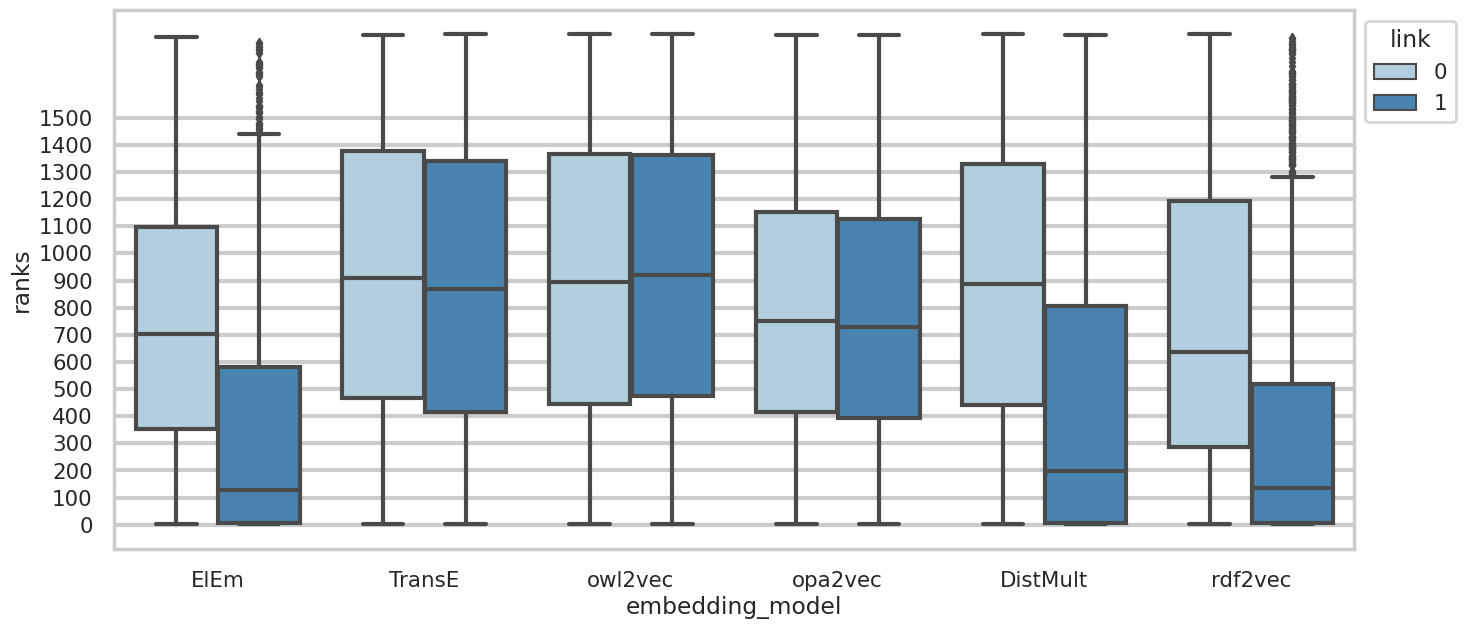

In [ ]:
import matplotlib.ticker as plticker
#loc = plticker.MultipleLocator(base=250) #21
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.7,rc={"grid.linewidth": 3})
plt.figure(figsize=(16,7))
ax=sns.boxplot(data=df_mer_melt,x='embedding_model',y='ranks',hue='link',palette="Blues")
#ax.xaxis.set_major_locator(loc)
plt.yticks(k)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))